In [11]:
from tomoSegmentPipeline.showcaseResults import (predict_fullTomogram, load_model, load_tomoData, Tversky_index,
                                        fullTomogram_modelComparison, make_comparison_plot, write_comparison_gif, save_classPred)

from tomoSegmentPipeline.losses import Tversky_loss
from tomoSegmentPipeline.utils.common import read_array
import tomoSegmentPipeline.dataloader as dl
from tomoSegmentPipeline.utils import setup
from tomoSegmentPipeline.dataloader import to_categorical, transpose_to_channels_first
from tomoSegmentPipeline.trainWrapper import make_trainer

PARENT_PATH = setup.PARENT_PATH

import numpy as np
import matplotlib.pyplot as plt
import random
import mrcfile
import pandas as pd
import torch
import os
from glob import glob

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

train_tomos = ['tomo02', 'tomo03', 'tomo17']
concat_train_ids = sorted([s.replace('tomo', '') for s in train_tomos])
concat_train_ids = '-'.join(concat_train_ids)

val_tomos = ['tomo32', 'tomo10']
concat_val_ids = sorted([s.replace('tomo', '') for s in val_tomos])
concat_val_ids = '-'.join(concat_val_ids)

test_tomos = ['tomo38', 'tomo04']
concat_test_ids = sorted([s.replace('tomo', '') for s in test_tomos])
concat_test_ids = '-'.join(concat_test_ids)


paths_trainData, paths_trainTarget = setup.get_paths(train_tomos, 'cryoCARE')
paths_valData, paths_valTarget = setup.get_paths(val_tomos, 'cryoCARE')
paths_testData, paths_testTarget = setup.get_paths(test_tomos, 'cryoCARE')



model_fileList = [os.path.join(PARENT_PATH, f) for f in model_fileList]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Sanity check: Models generated by DDP are the same

In [9]:
model1 = load_model(model_fileList[0], 2)
model1.output_device

0

In [10]:
model2 = load_model(model_fileList[1], 2)
model2.output_device

0

In [23]:
# Models generated by DDP are the same
for name in model1.state_dict().keys():
    print((model1.state_dict()[name] != model2.state_dict()[name]).sum())

tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')


In [10]:
paths_trainData[0]

'/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo02_patch000_0000.nii.gz'

In [13]:
for tomo_file, label_file in zip(paths_trainData, paths_trainTarget):
    
    class1_predDict, dice1_dict, class1, tomogram_data = fullTomogram_modelComparison(model_fileList, n_centers_list, tomo_file, label_file)
    print(dice1_dict, '\n')
    break

Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:02<00:00, 23.74it/s]


Saving model predictions...
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:02<00:00, 24.06it/s]


Saving model predictions...
{'3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9921, 0.9654], device='cuda:0'), '3.00_lowBaseline_ep500_in56_lr0.000100_1': tensor([0.9911, 0.9616], device='cuda:0')} 



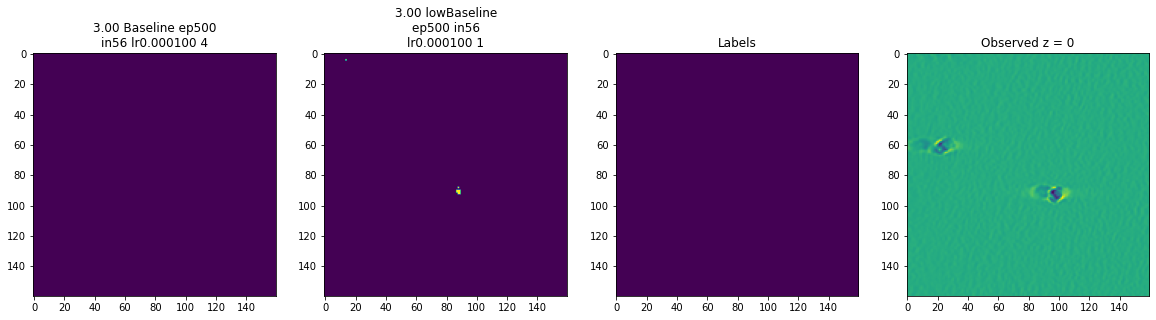

<Figure size 432x288 with 0 Axes>

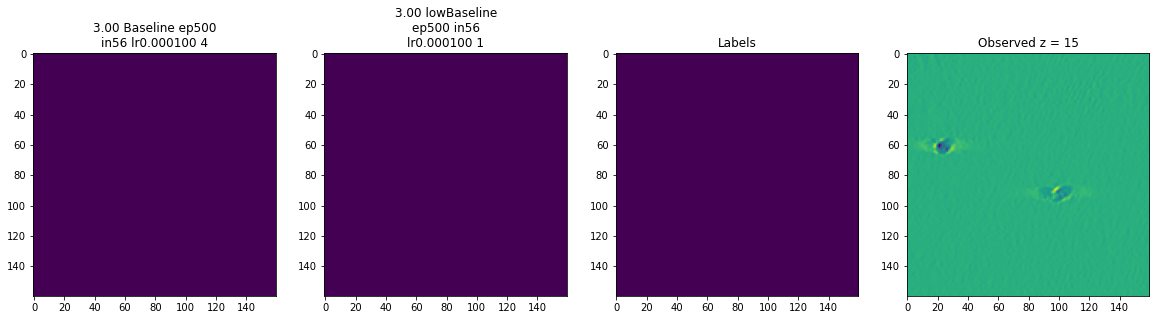

<Figure size 432x288 with 0 Axes>

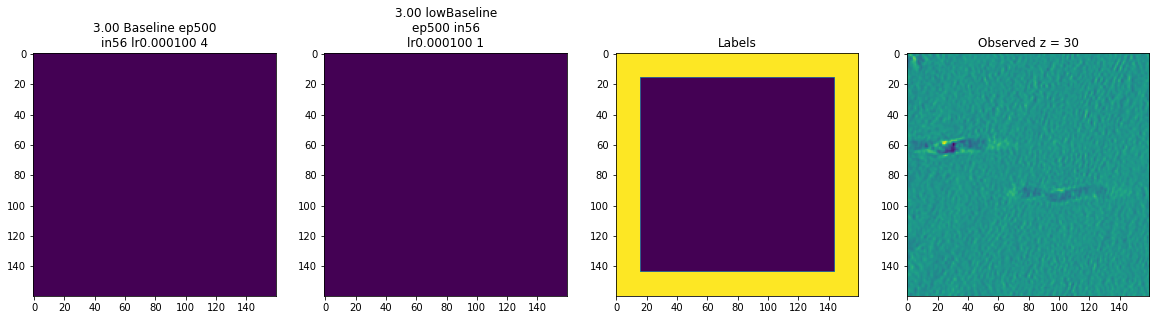

<Figure size 432x288 with 0 Axes>

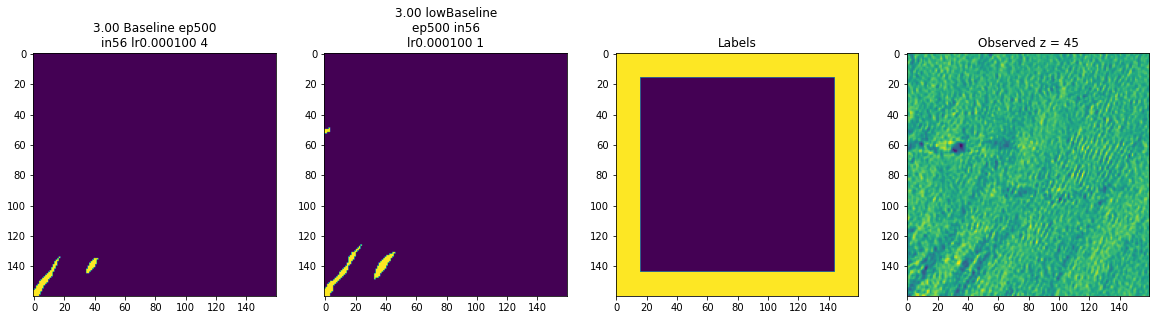

<Figure size 432x288 with 0 Axes>

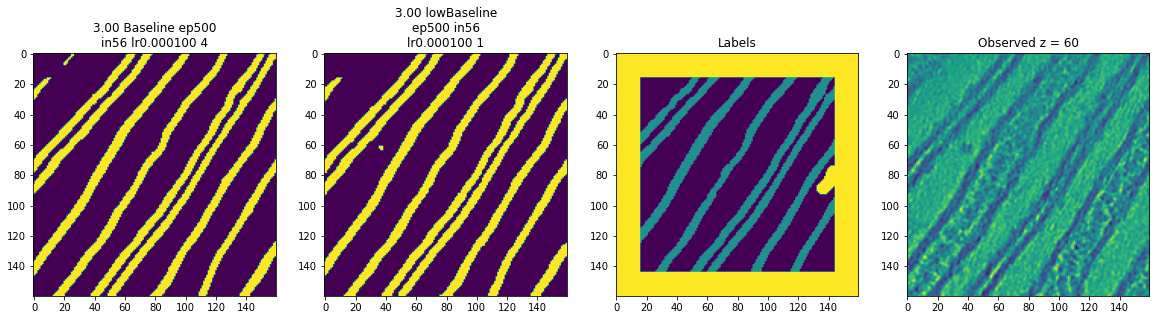

<Figure size 432x288 with 0 Axes>

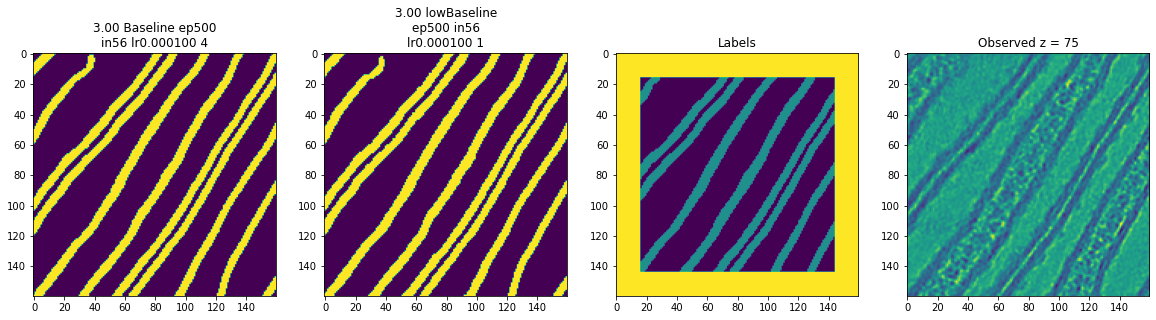

<Figure size 432x288 with 0 Axes>

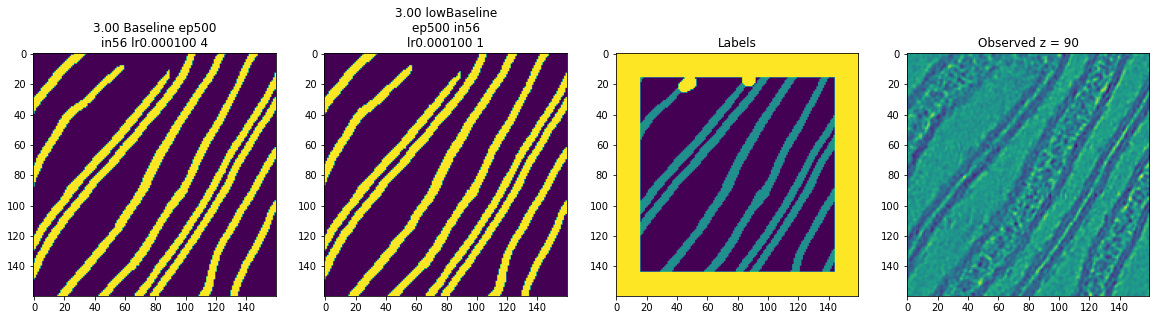

<Figure size 432x288 with 0 Axes>

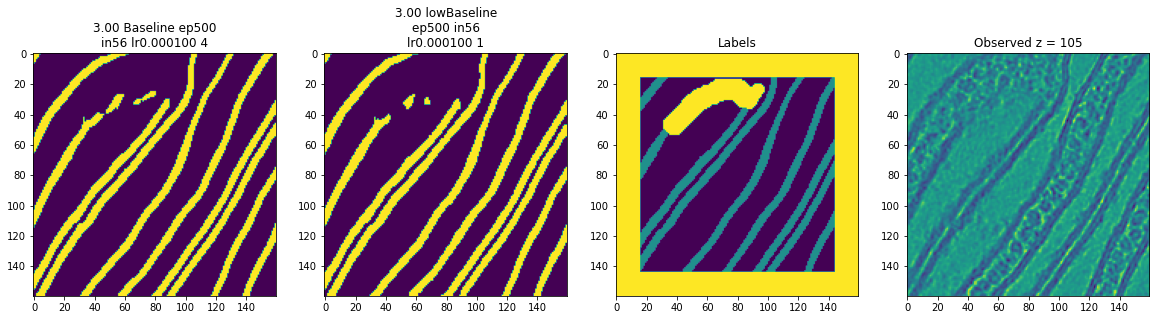

<Figure size 432x288 with 0 Axes>

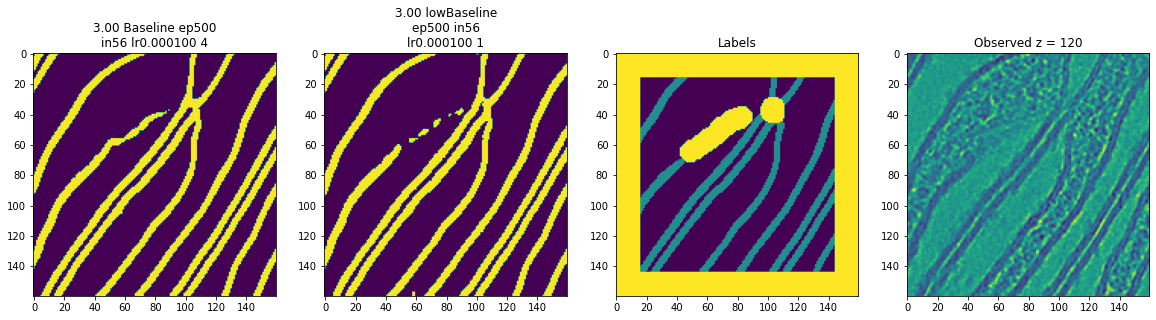

<Figure size 432x288 with 0 Axes>

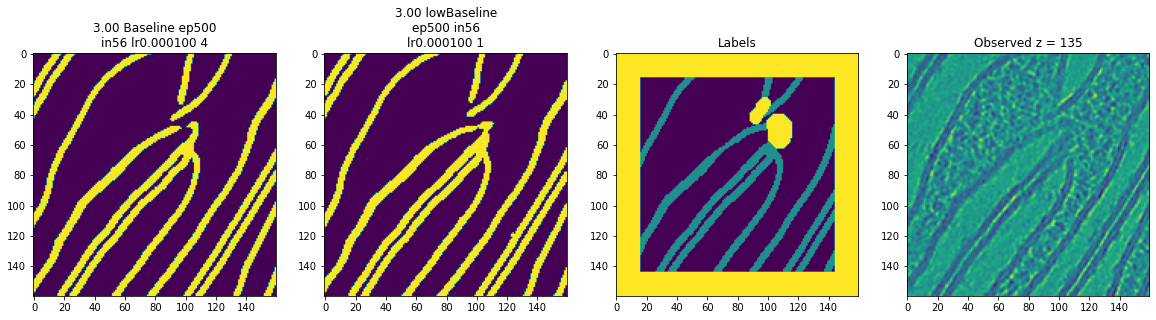

<Figure size 432x288 with 0 Axes>

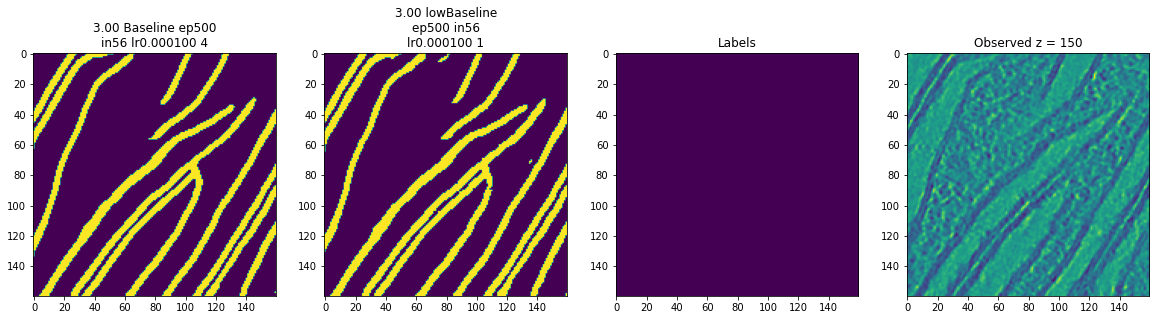

<Figure size 432x288 with 0 Axes>

In [14]:
make_comparison_plot(class1_predDict, class1, tomogram_data)

# Validation tomogram prediction

## Patches

In [13]:
# n_centers_list = [2 for _ in range(len(model_fileList))]
n_centers_list = [4, 2, 2]

for tomo_file, label_file in zip(paths_valData, paths_valTarget):
    print(tomo_file)
    class1_predDict, dice1_dict, class1, tomogram_data = fullTomogram_modelComparison(model_fileList, n_centers_list, tomo_file, label_file, overwrite_prediction=False)
    print(dice1_dict, '\n')

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo10_patch001_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9923, 0.9720], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9731, 0.9073], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9745, 0.9140], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo10_patch002_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 62.67it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.94it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9947, 0.5852], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9979, 0.7558], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9979, 0.7753], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo10_patch003_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 62.64it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.92it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9918, 0.9610], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9726, 0.8764], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9723, 0.8786], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo10_patch009_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 63.81it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.63it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9902, 0.9606], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9725, 0.8947], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9730, 0.8996], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo10_patch010_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:00<00:00, 64.62it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.23it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9909, 0.9467], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9714, 0.8450], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9710, 0.8482], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo10_patch011_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 63.21it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.33it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9844, 0.9039], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9673, 0.8171], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9645, 0.8153], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo10_patch020_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 62.60it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.97it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9867, 0.9447], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9669, 0.8675], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9661, 0.8708], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo10_patch030_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 61.69it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.92it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9496, 0.0000], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9995, 0.0000], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9976, 0.0000], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch000_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 62.44it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.84it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9955, 0.9540], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9822, 0.8266], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9821, 0.8329], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch002_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 63.03it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 23.01it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9912, 0.9648], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9717, 0.8941], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9703, 0.8916], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch004_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:00<00:00, 64.21it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 21.81it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9976, 0.9500], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9898, 0.8169], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9896, 0.8168], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch006_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 61.89it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.83it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9967, 0.9394], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9891, 0.8114], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9898, 0.8287], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch008_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 62.37it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.82it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9917, 0.9562], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9746, 0.8746], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9732, 0.8718], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch010_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 63.70it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.80it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9938, 0.9549], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9783, 0.8538], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9781, 0.8561], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch012_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 59.63it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.90it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9924, 0.9445], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9802, 0.8642], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9804, 0.8672], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch014_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 61.14it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.33it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9993, 0.9313], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9960, 0.7113], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9957, 0.7004], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch020_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:00<00:00, 64.59it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 21.35it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9965, 0.9420], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9877, 0.8225], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([0.9872, 0.8180], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch030_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 60.11it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.91it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([1.0000, 0.0000], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([1., nan], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([1.0000, 0.0000], device='cuda:0')} 

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch031_0000.nii.gz
Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:01<00:00, 60.25it/s]


Saving model predictions...
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.96it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9992, 0.0000], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([1., nan], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep900_in84_lr0.000010_100': tensor([1., nan], device='cuda:0')} 



In [4]:
print(tomo_file)
print(dice1_dict, '\n')

/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo32_patch031_0000.nii.gz
{'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([1., nan], device='cuda:0'), 'train02/3.00_lowBaseline_ep800_in84_lr0.000010_4': tensor([0.9994, 0.0000], device='cuda:0'), 'train03/3.00_lowBaseline_ep800_in84_lr0.000010_4': tensor([1., nan], device='cuda:0'), 'train17/3.00_lowBaseline_ep800_in84_lr0.000010_4': tensor([0.9996, 0.0000], device='cuda:0')} 



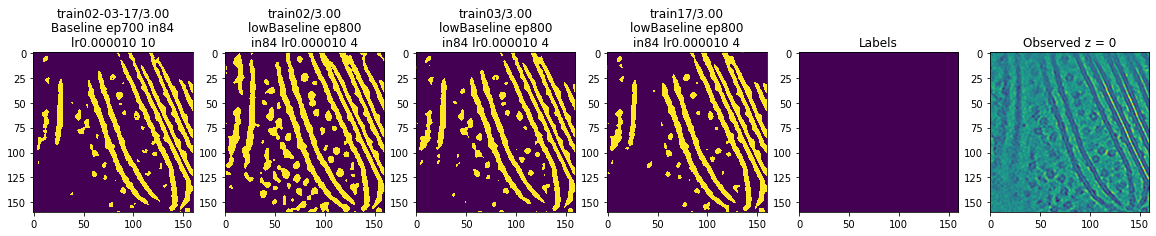

<Figure size 432x288 with 0 Axes>

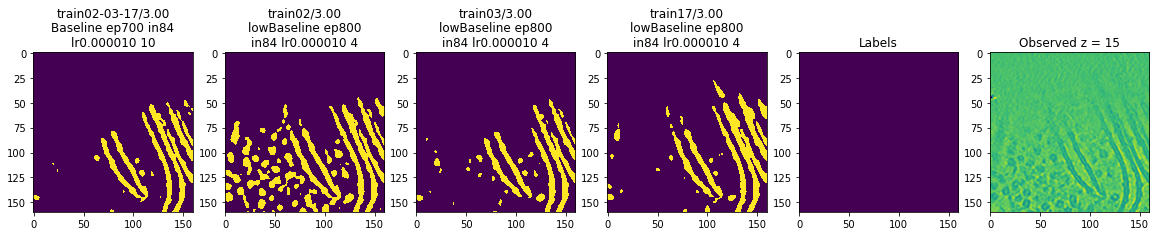

<Figure size 432x288 with 0 Axes>

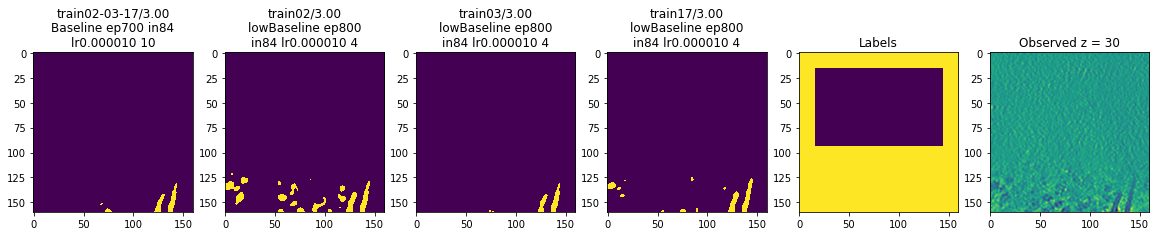

<Figure size 432x288 with 0 Axes>

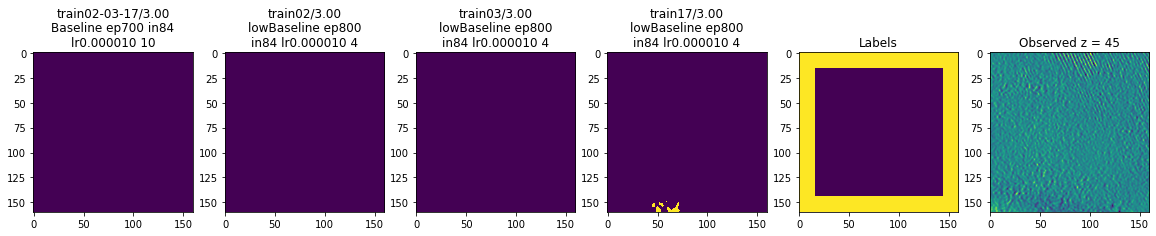

<Figure size 432x288 with 0 Axes>

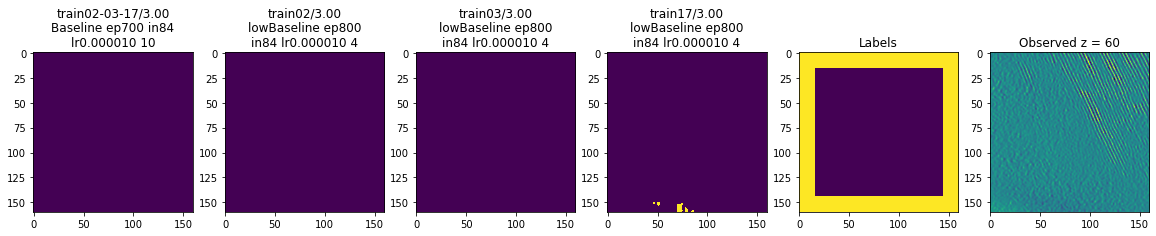

<Figure size 432x288 with 0 Axes>

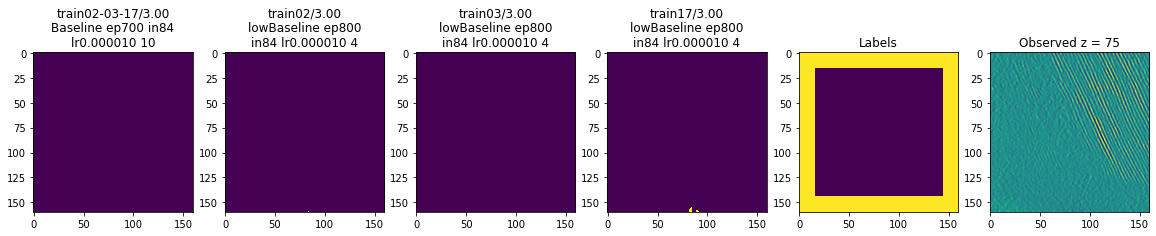

<Figure size 432x288 with 0 Axes>

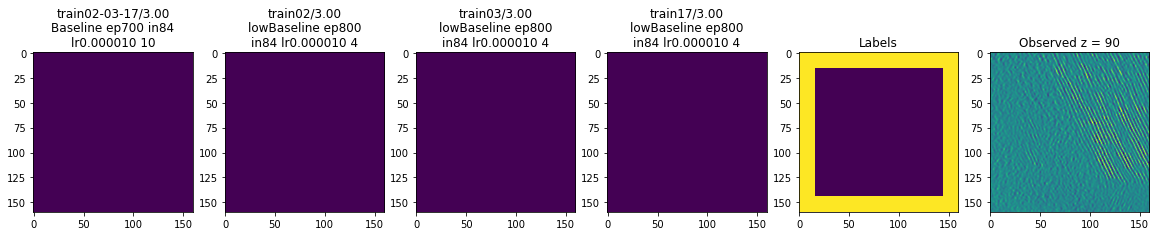

<Figure size 432x288 with 0 Axes>

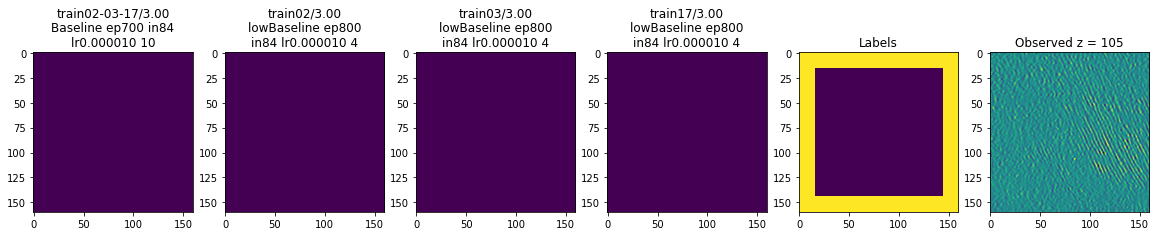

<Figure size 432x288 with 0 Axes>

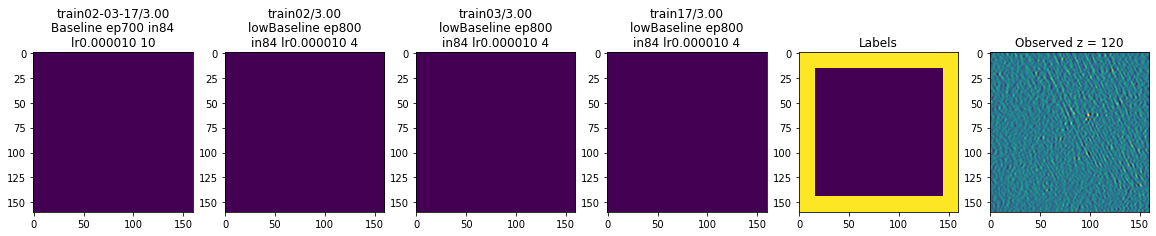

<Figure size 432x288 with 0 Axes>

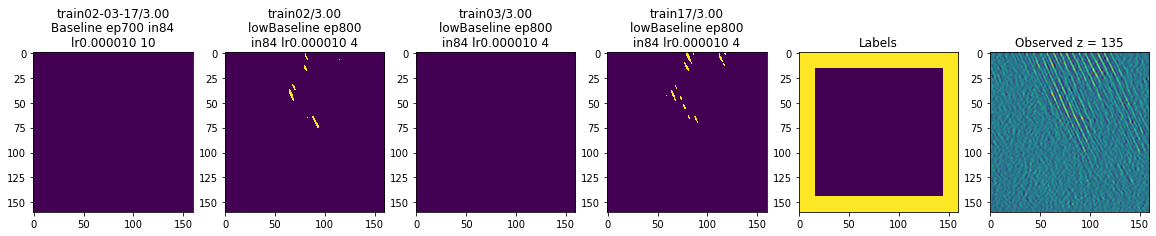

<Figure size 432x288 with 0 Axes>

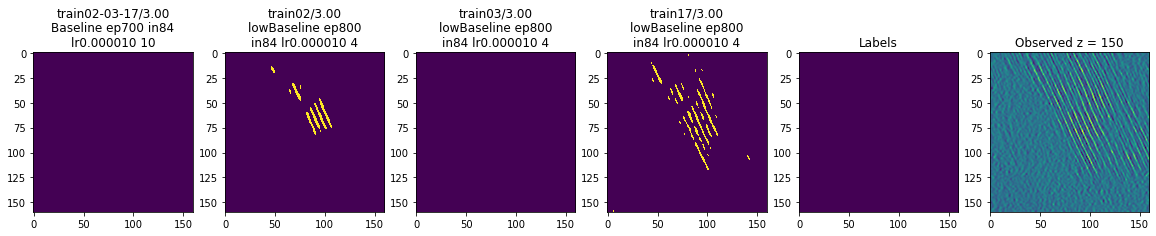

<Figure size 432x288 with 0 Axes>

In [3]:
make_comparison_plot(class1_predDict, class1, tomogram_data)

In [29]:
write_comparison_gif(class1_predDict, class1, tomogram_data)

100%|██████████| 160/160 [01:45<00:00,  1.52it/s]


Removing Images

DONE


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Full tomograms

In [ ]:
n_centers_list = [12 for _ in range(len(model_fileList))]

aux_tomo_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/%s_bin4_denoised_0000.nii.gz'
aux_label_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/%s_merged_thr02.nii.gz'

for tomo in val_tomos:
    print('###############', tomo)
    tomo_file = aux_tomo_file %tomo
    label_file = aux_label_file %tomo
    class1_predDict, dice1_dict, classes, tomogram_data = fullTomogram_modelComparison(model_fileList, n_centers_list, tomo_file, label_file, True)
    print(dice1_dict, '\n')

# Full test tomogram prediction

In [2]:
n_centers_list = [12 for _ in range(len(model_fileList))]

aux_tomo_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/%s_bin4_denoised_0000.nii.gz'
aux_label_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/%s_merged_thr02.nii.gz'

for tomo in test_tomos:
    print('###############', tomo)
    tomo_file = aux_tomo_file %tomo
    label_file = aux_label_file %tomo
    class1_predDict, dice1_dict, classes, tomogram_data = fullTomogram_modelComparison(model_fileList, n_centers_list, tomo_file, label_file, False)
    print(dice1_dict, '\n')

Tomogram shape:  (464, 928, 928)
Predicting full tomogram using 12 centers...


100%|██████████| 864/864 [00:39<00:00, 21.88it/s]


Saving model predictions...
Predicting full tomogram using 12 centers...


100%|██████████| 864/864 [00:38<00:00, 22.55it/s]


Saving model predictions...
Predicting full tomogram using 12 centers...


100%|██████████| 864/864 [00:38<00:00, 22.53it/s]


Saving model predictions...
Predicting full tomogram using 12 centers...


100%|██████████| 864/864 [00:38<00:00, 22.51it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9944, 0.8079], device='cuda:0'), 'train02/3.00_lowBaseline_ep800_in84_lr0.000010_4': tensor([0.9837, 0.6059], device='cuda:0'), 'train03/3.00_lowBaseline_ep800_in84_lr0.000010_4': tensor([0.9933, 0.7727], device='cuda:0'), 'train17/3.00_lowBaseline_ep800_in84_lr0.000010_4': tensor([0.9915, 0.7429], device='cuda:0')} 

Tomogram shape:  (464, 928, 928)
Predicting full tomogram using 12 centers...


100%|██████████| 864/864 [00:38<00:00, 22.53it/s]


Saving model predictions...
Predicting full tomogram using 12 centers...


100%|██████████| 864/864 [00:38<00:00, 22.56it/s]


Saving model predictions...
Predicting full tomogram using 12 centers...


100%|██████████| 864/864 [00:38<00:00, 22.32it/s]


Saving model predictions...
Predicting full tomogram using 12 centers...


100%|██████████| 864/864 [00:38<00:00, 22.29it/s]


Saving model predictions...
{'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9841, 0.6433], device='cuda:0'), 'train02/3.00_lowBaseline_ep800_in84_lr0.000010_4': tensor([0.9735, 0.5265], device='cuda:0'), 'train03/3.00_lowBaseline_ep800_in84_lr0.000010_4': tensor([0.9868, 0.6727], device='cuda:0'), 'train17/3.00_lowBaseline_ep800_in84_lr0.000010_4': tensor([0.9777, 0.5472], device='cuda:0')} 



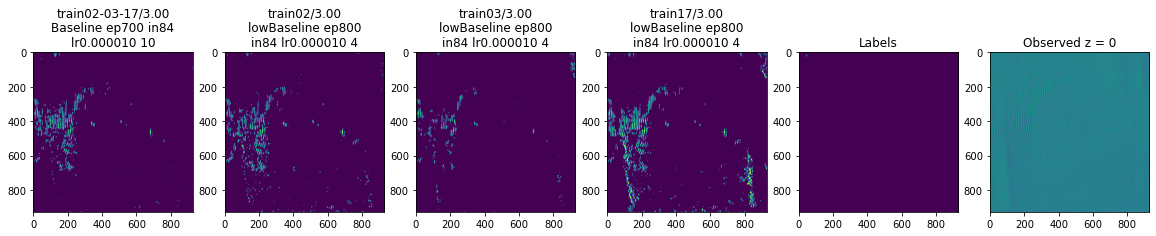

<Figure size 432x288 with 0 Axes>

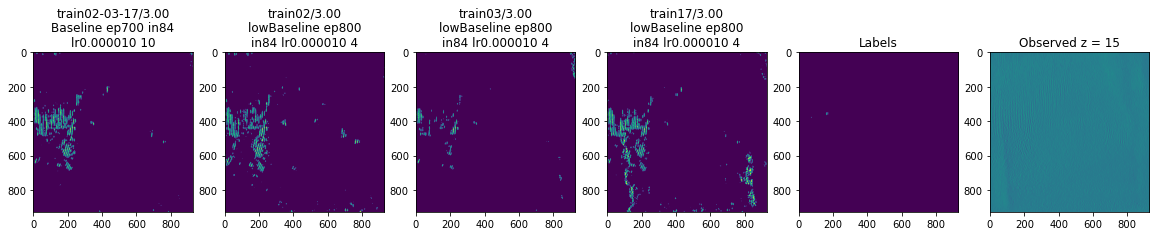

<Figure size 432x288 with 0 Axes>

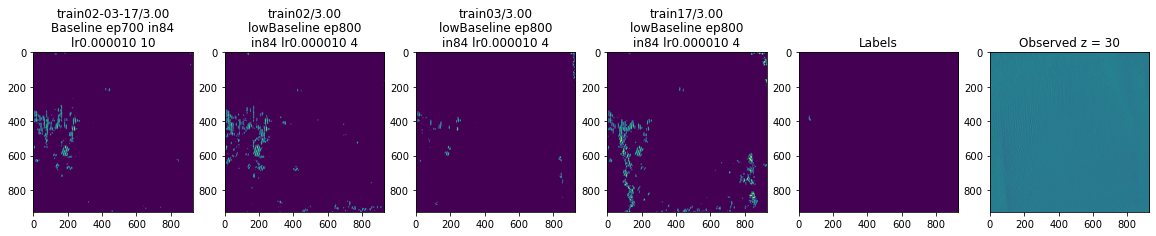

<Figure size 432x288 with 0 Axes>

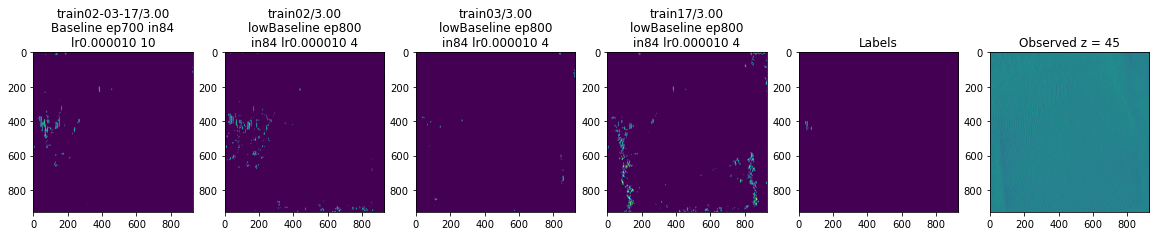

<Figure size 432x288 with 0 Axes>

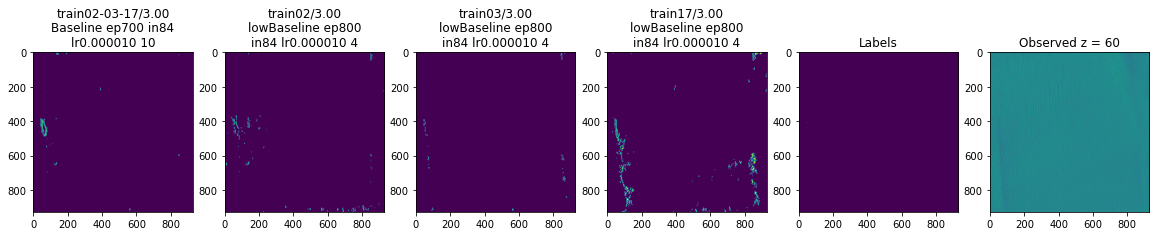

<Figure size 432x288 with 0 Axes>

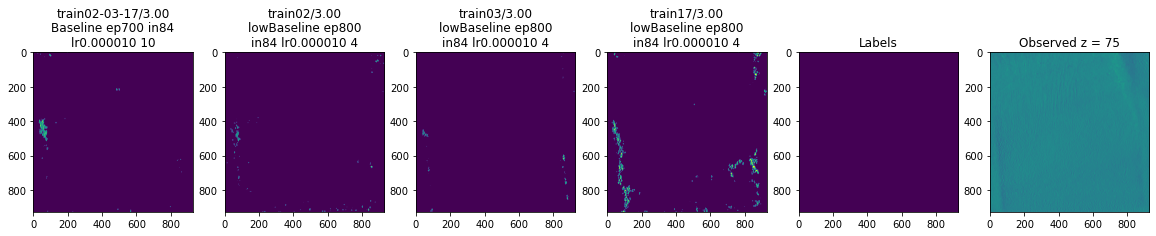

<Figure size 432x288 with 0 Axes>

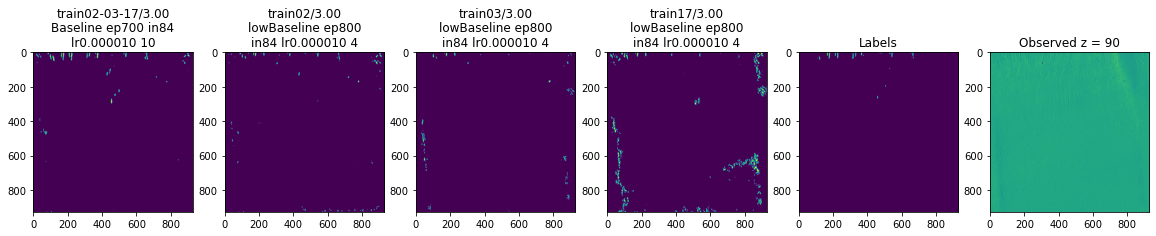

<Figure size 432x288 with 0 Axes>

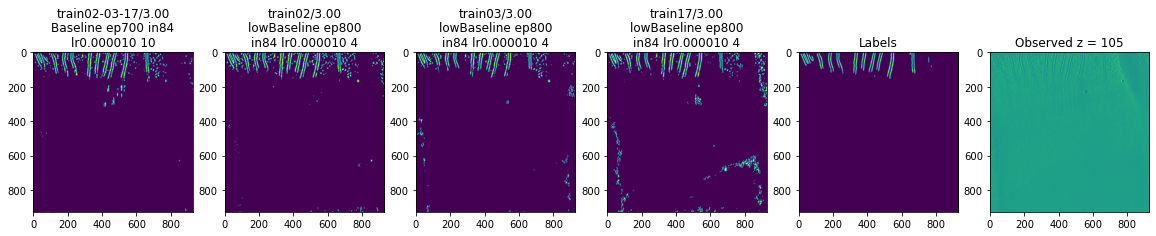

<Figure size 432x288 with 0 Axes>

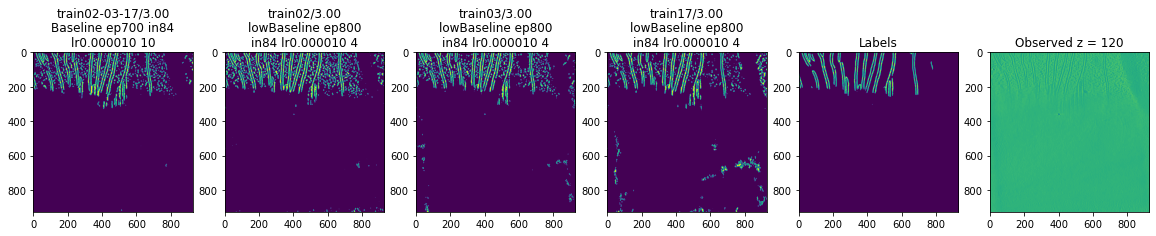

<Figure size 432x288 with 0 Axes>

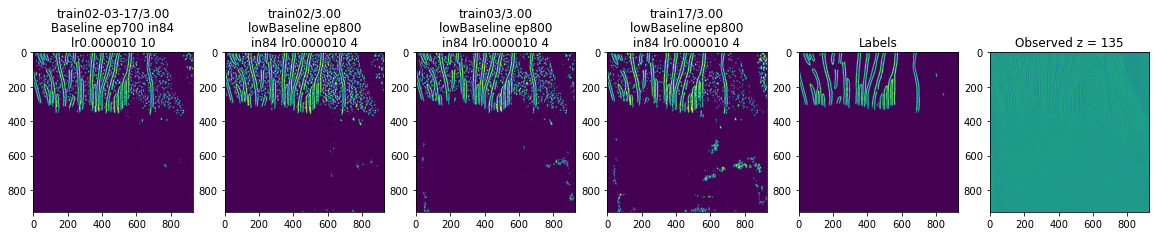

<Figure size 432x288 with 0 Axes>

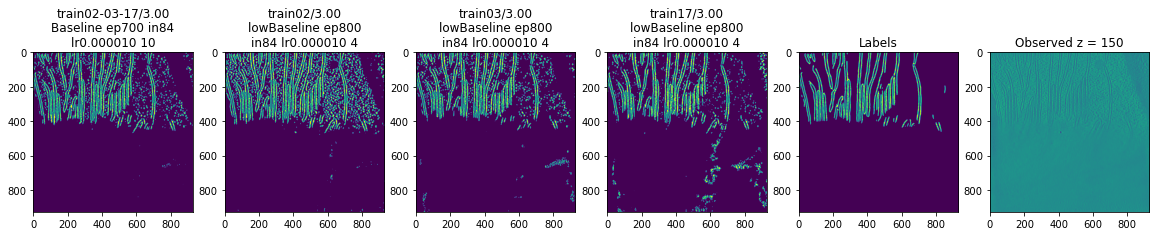

<Figure size 432x288 with 0 Axes>

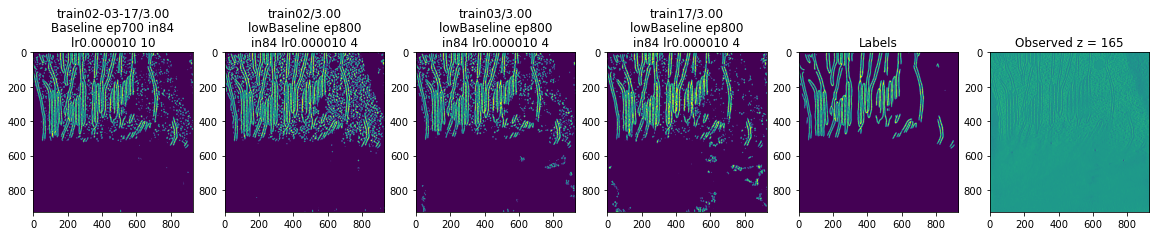

<Figure size 432x288 with 0 Axes>

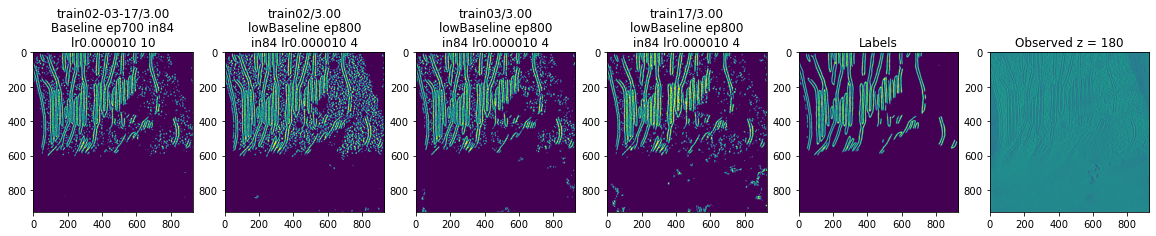

<Figure size 432x288 with 0 Axes>

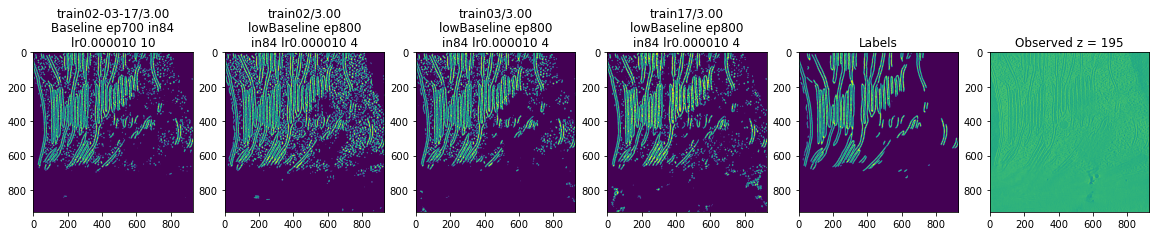

<Figure size 432x288 with 0 Axes>

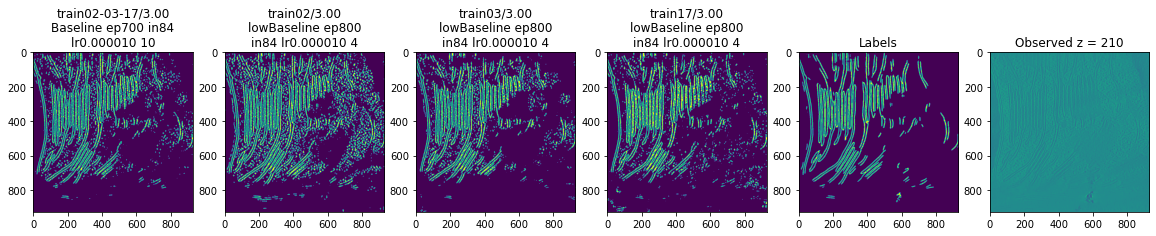

<Figure size 432x288 with 0 Axes>

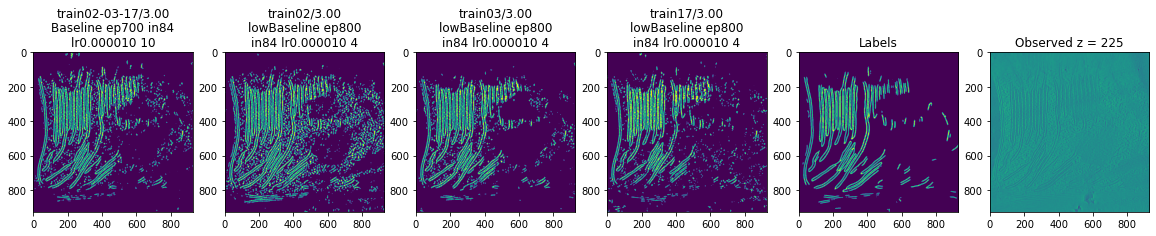

<Figure size 432x288 with 0 Axes>

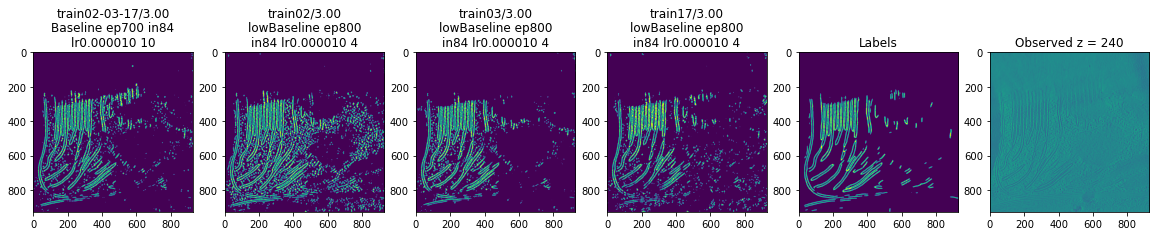

<Figure size 432x288 with 0 Axes>

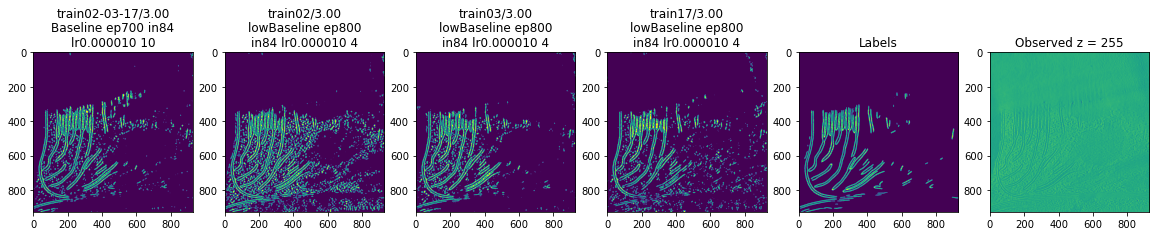

<Figure size 432x288 with 0 Axes>

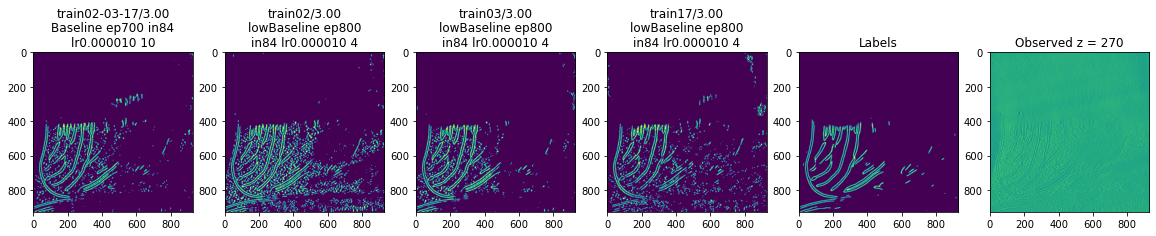

<Figure size 432x288 with 0 Axes>

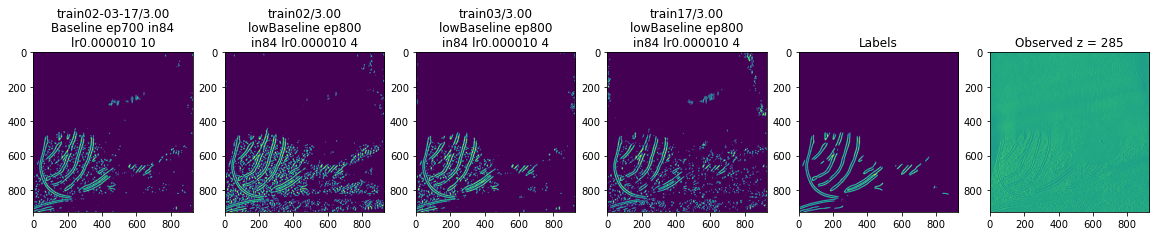

<Figure size 432x288 with 0 Axes>

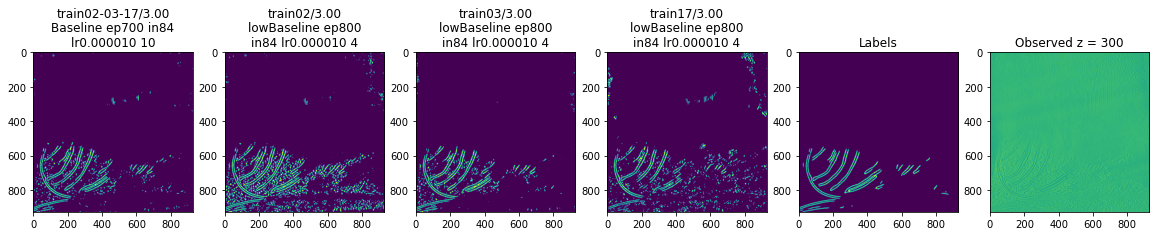

<Figure size 432x288 with 0 Axes>

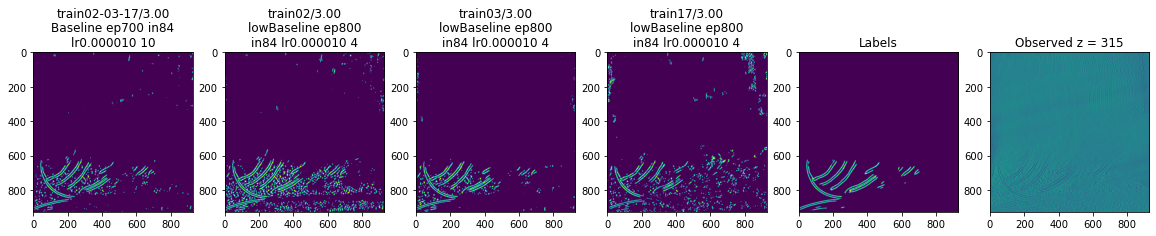

<Figure size 432x288 with 0 Axes>

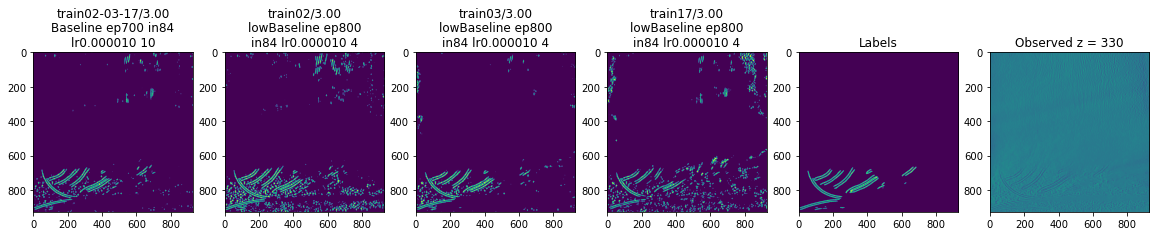

<Figure size 432x288 with 0 Axes>

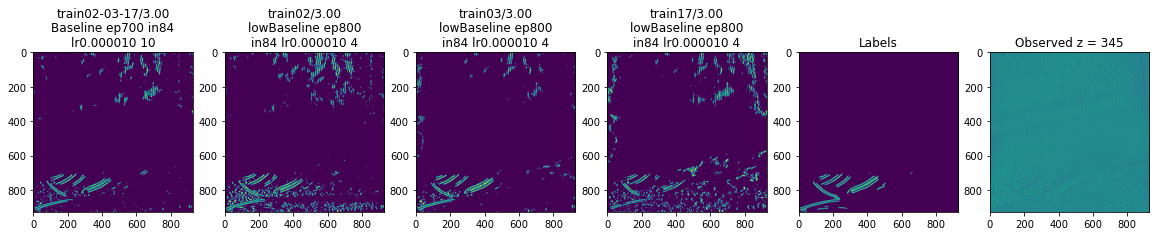

<Figure size 432x288 with 0 Axes>

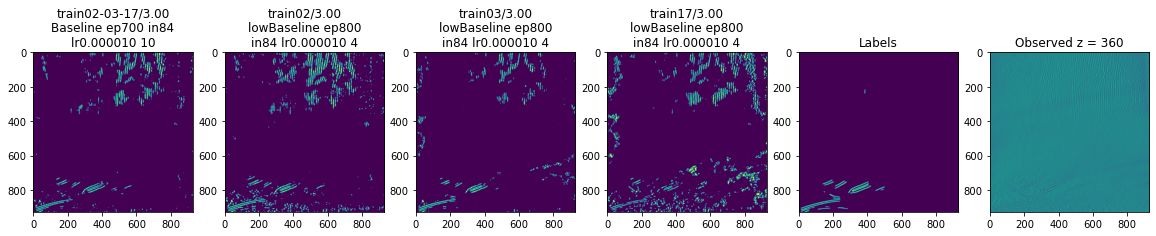

<Figure size 432x288 with 0 Axes>

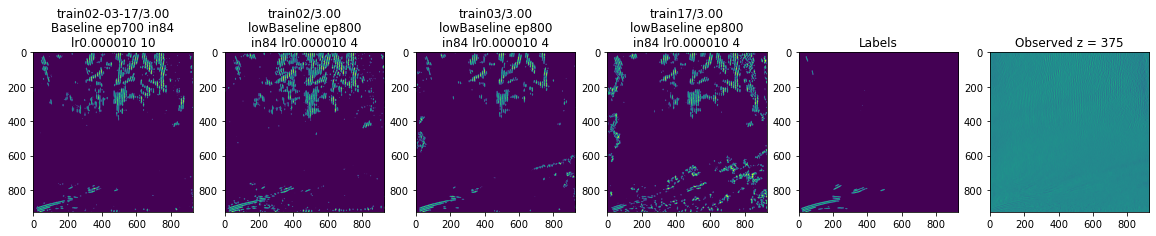

<Figure size 432x288 with 0 Axes>

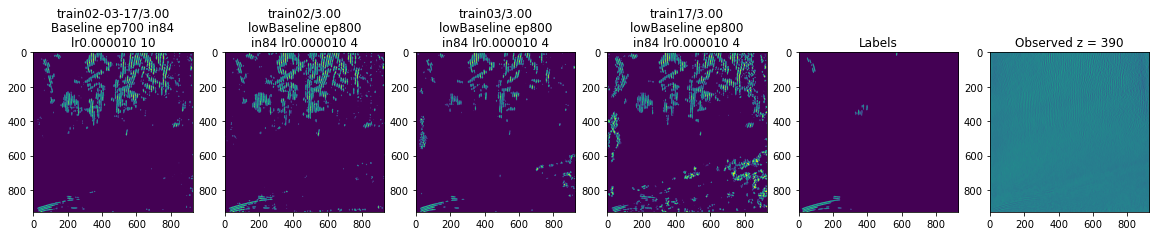

<Figure size 432x288 with 0 Axes>

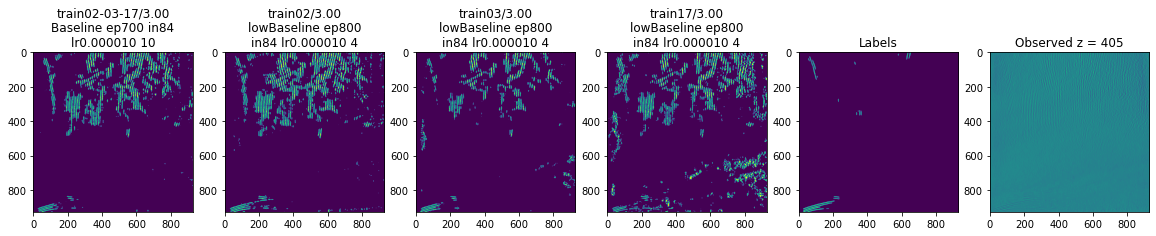

<Figure size 432x288 with 0 Axes>

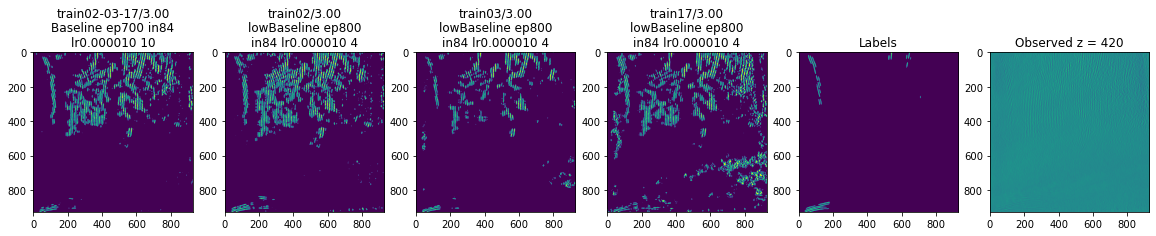

<Figure size 432x288 with 0 Axes>

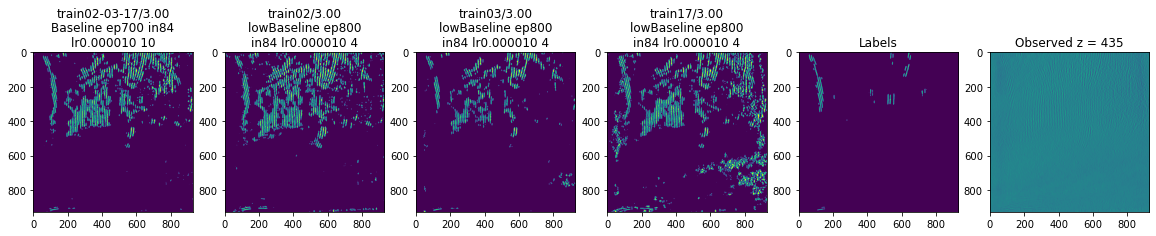

<Figure size 432x288 with 0 Axes>

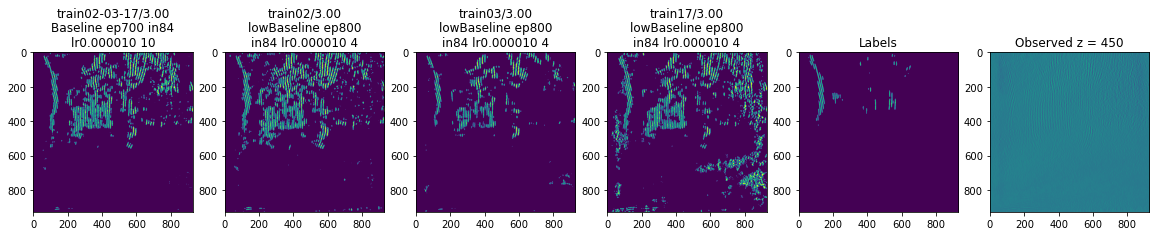

<Figure size 432x288 with 0 Axes>

In [3]:
make_comparison_plot(class1_predDict, classes, tomogram_data)

# Compare Dice Scores

In [8]:
model_fileList = ['models/logs/BaselineModel/train02-03-17/version_4/3.00_Baseline_ep500_in56_lr0.000100_4.model',
                  'models/logs/BaselineModel/train02-03-17/version_10/3.00_Baseline_ep700_in84_lr0.000010_10.model']

model_fileList = [os.path.join(PARENT_PATH, f) for f in model_fileList]

n_centers_list = [12 for _ in range(len(model_fileList))]

aux_tomo_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/%s_bin4_denoised_0000.nii.gz'
aux_label_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/%s_merged_thr02.nii.gz'

for tomo in test_tomos:
    print('###############', tomo)
    tomo_file = aux_tomo_file %tomo
    label_file = aux_label_file %tomo
    class1_predDict, dice1_dict, classes, tomogram_data = fullTomogram_modelComparison(model_fileList, n_centers_list, tomo_file, label_file,
                                                                                       overwrite_prediction=False, is_model_data=False)
    print(dice1_dict, '\n')

############### tomo38
Tomogram shape:  (464, 928, 928)
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9938, 0.8057], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9944, 0.8079], device='cuda:0')} 

############### tomo04
Tomogram shape:  (464, 928, 928)
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4
Found existing tomogram prediction for  train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10
{'train02-03-17/3.00_Baseline_ep500_in56_lr0.000100_4': tensor([0.9932, 0.8143], device='cuda:0'), 'train02-03-17/3.00_Baseline_ep700_in84_lr0.000010_10': tensor([0.9841, 0.6433], device='cuda:0')} 

